# Comandos e Funções

In [1]:
### Bibliotecas a serem instaladas no conda
#conda install opencv=3.4.2
#conda install jupyter
#conda install matplotlib
#conda install pillow

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## OpenCV
Documentação para versão 3.4.2:

https://docs.opencv.org/3.4.2/d6/d00/tutorial_py_root.html

Tutoriais úteis:

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

(1342, 1600, 3)


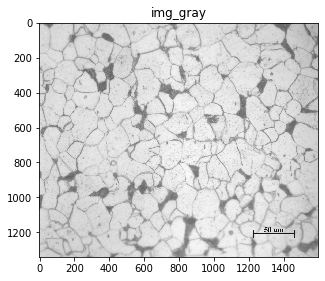

In [2]:
#Abrindo Imagem
img = plt.imread('data/aço 1010 50x - corrigido (1).jpg')
print(img.shape)

#Conversão de uma imagem para outro sistema de cores
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Visualização de Imagem individual
plt.figure(figsize=(5,5)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')

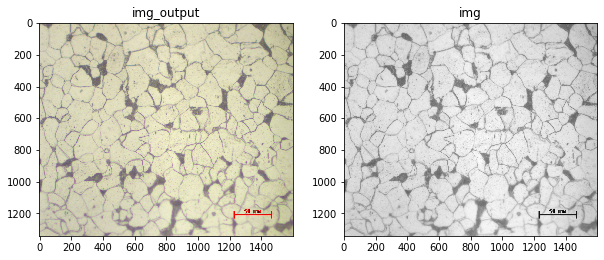

In [130]:
#Visualização de várias imagens
   #plt.subplot(#linhas #colunas linha coluna)
plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img_output'); fig=plt.imshow(img, 'gray')
plt.subplot(122); plt.title('img'); fig=plt.imshow(img_gray, 'gray')

## Histograma
https://docs.opencv.org/3.4.2/d4/d1b/tutorial_histogram_equalization.html

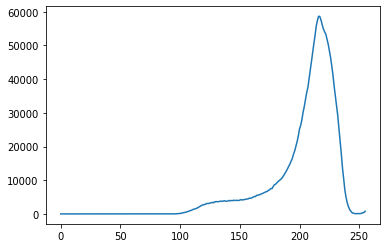

In [5]:
#Histograma
histograma = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(histograma)
plt.show()

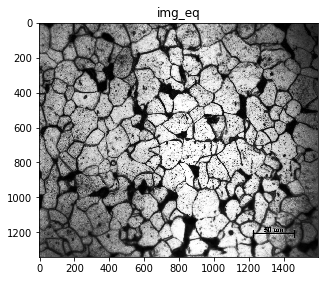

In [6]:
#Equalização de Histograma
img_eq = cv2.equalizeHist(img_gray)

plt.figure(figsize=(5,5)); plt.title("img_eq"); fig = plt.imshow(img_eq, 'gray')

## Limiarização ou Thresholding
https://docs.opencv.org/3.4.2/d7/d4d/tutorial_py_thresholding.html

120.0


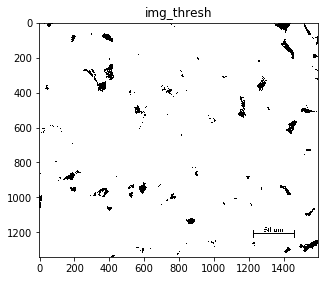

In [9]:
#Básico
threshold, img_thresh = cv2.threshold(img_gray, 120, 255, 0)

print(threshold)
plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

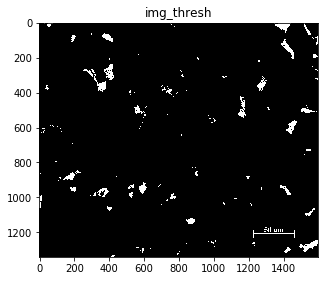

In [11]:
#Invertido
threshold, img_thresh = cv2.threshold(img_gray, 120, 255, cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

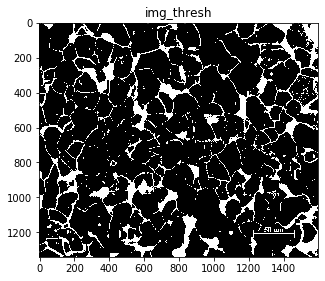

In [12]:
#Ponto de Corte ótimo
threshold, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)#+cv2.THRESH_BINARY_INV)

plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

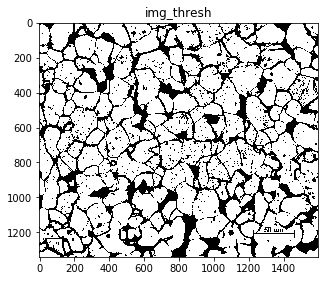

In [13]:
#Adaptivo
#http://homepages.inf.ed.ac.uk/rbf/HIPR2/adpthrsh.htm
img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 3) 

plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

## Convolução e Núcleos ou Kernels

In [14]:
#Kernel ou núcleo ou vizinhança
kernel = np.ones([3,3])
print(kernel)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [17]:
#Kernels prontos do Opencv
quadrado = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
cruz = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
print(cruz)
print(ellipse)

[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


In [96]:
#Construção de kernel redondo 
# https://stackoverflow.com/questions/10031580/how-to-write-simple-geometric-shapes-into-numpy-arrays
def getCircle(n):
    '''kernel has size NxN'''
    # xx and yy are 200x200 tables containing the x and y coordinates as values
    # mgrid is a mesh creation helper
    xx, yy = np.mgrid[:n,:n]
    # circles contains the squared distance to the (100, 100) point
    # we are just using the circle equation learnt at school
    circle = (xx - np.floor(n/2)) ** 2 + (yy - np.floor(n/2)) ** 2
    circle = circle<=np.max(circle)*.5
    circle = np.uint8(circle)
    return circle

kernel = getCircle(5)
print(kernel)

[[0 0 1 0 0]
 [0 1 1 1 0]
 [1 1 1 1 1]
 [0 1 1 1 0]
 [0 0 1 0 0]]


## Operação de Convolução
https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1

https://docs.opencv.org/3.4.2/d4/dbd/tutorial_filter_2d.html

In [97]:
#Criando função de operador de convolução genérico
def convolution(image, kernel): #kernel é um array
    y, x = image.shape
    ky, kx = kernel.shape
    divisor = np.sum(kernel) if (np.sum(kernel))!=0 else 1
    
    minusy= int((ky)/2)
    plusy = ky - minusy - 1
    minusx= int((kx)/2)
    plusx = kx - minusx - 1

    image_temp = np.zeros([minusy+y+plusy, minusx+x+plusx])+np.mean(image)
    image_temp[minusy:minusy+y, minusx:minusx+x] = np.copy(image)
    image_new = np.zeros((y,x))

    for i in range(minusy, minusy+y):
        for j in range(minusx, minusx+x):
            soma = 0
            for k in range(ky):
                for l in range(kx):
                    soma += image_temp[-minusy+i+k, -minusx+j+l]*kernel[k,l]
                    #print("soma:", soma)
                    #print("i,j,k,l,soma:",i,j,k,l,-minusy+i+k,-minusx+j+l)
            #print("total:", soma)        
            image_new[i-minusy,j-minusx] = soma/divisor
    return image_new.astype(np.float64)

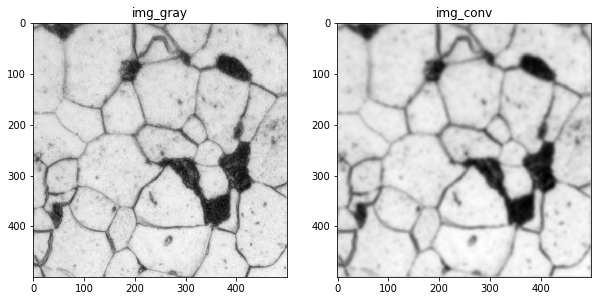

In [101]:
kernel = np.ones([7,7])
img_conv = convolution(img_gray[:500, :500], kernel)

plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img_gray'); fig=plt.imshow(img_gray[:500, :500], 'gray')
plt.subplot(122); plt.title('img_conv'); fig=plt.imshow(img_conv, 'gray')

## Filtros de Suavização
https://docs.opencv.org/3.4.2/d4/d13/tutorial_py_filtering.html

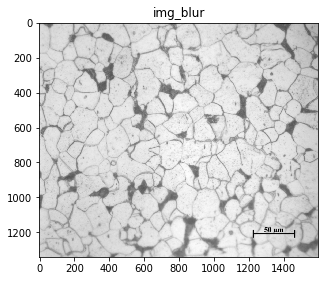

In [121]:
#Gaussiano
img_blur = cv2.GaussianBlur(img_gray, (11, 11), 1)

plt.figure(figsize=(5,5)); plt.title("img_blur"); fig=plt.imshow(img_blur, "gray")

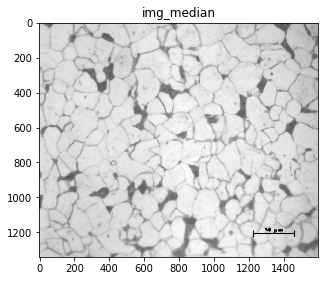

In [127]:
#Mediana
img_median = cv2.medianBlur(img_gray,11,3)

plt.figure(figsize=(5,5)); plt.title("img_median"); fig = plt.imshow(img_median, 'gray')

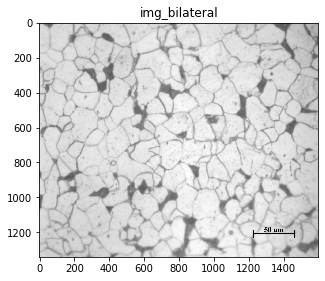

In [128]:
#Bilateral
img_bilateral = cv2.bilateralFilter(img_gray,9,75,75)

plt.figure(figsize=(5,5)); plt.title("img_bilateral"); fig = plt.imshow(img_bilateral, 'gray')

## Erosão, Dilatação e seus derivados
https://docs.opencv.org/3.4.2/db/df6/tutorial_erosion_dilatation.html

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

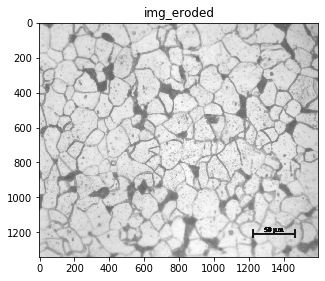

In [102]:
#Erosão
kernel = np.ones((5,5))
img_eroded = cv2.erode(img_gray,kernel,iterations=1)

plt.figure(figsize=(5,5)); plt.title("img_eroded"); fig=plt.imshow(img_eroded, "gray")

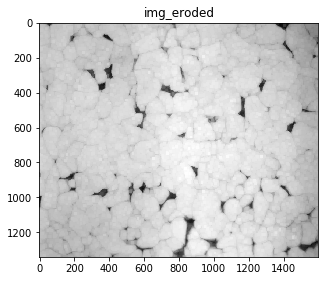

In [104]:
#Dilatação
kernel = np.ones((15,15))
img_dilated = cv2.dilate(img_gray,kernel,iterations=1)

plt.figure(figsize=(5,5)); plt.title("img_eroded"); fig=plt.imshow(img_dilated, "gray")

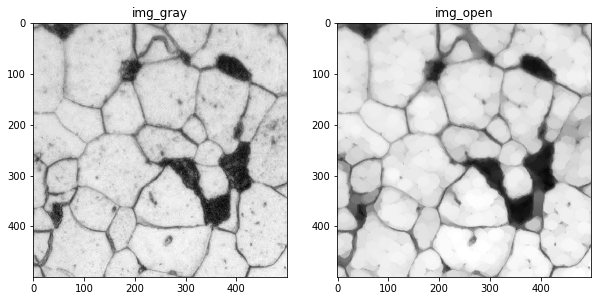

In [111]:
#Erosão + Dilatação = Abertura
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))

#img_eroded_dilated = cv2.erode(img_gray,           kernel,iterations=3)
#img_eroded_dilated = cv2.dilate(img_eroded_dilated,kernel,iterations=3)

img_open = cv2.morphologyEx(img_gray,cv2.MORPH_OPEN,kernel, iterations = 3)

plt.figure(figsize=(10,10))
plt.subplot(121),plt.imshow(img_gray[:500,:500],"gray"),plt.title('img_gray')
plt.subplot(122),plt.imshow(img_open[:500,:500],"gray"),plt.title('img_open')
plt.show()

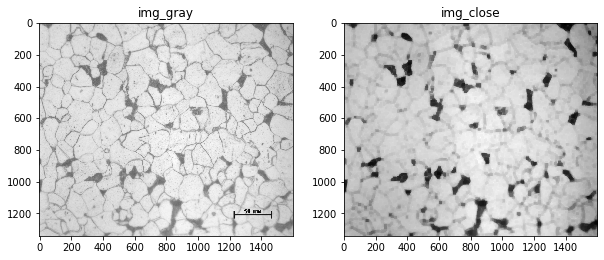

In [117]:
#Dilatação + Erosão = Fechamento
kernel = np.ones((7,7))
img_close = cv2.morphologyEx(img_gray,cv2.MORPH_CLOSE,kernel, iterations = 2)

plt.figure(figsize=(10,10)) 
plt.subplot(121),plt.imshow(img_gray,"gray"),plt.title('img_gray')
plt.subplot(122),plt.imshow(img_close,"gray"),plt.title('img_close')
plt.show()

## Outras Funções

uint8
0 255


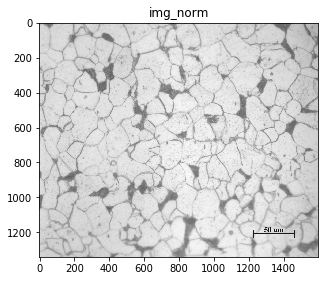

In [134]:
#Filtro de normalização - útil quando há problemas em operações de soma ou subtração de imagens
img_norm = cv2.normalize(img_gray, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
print(img_norm.dtype)
print(np.min(img_norm), np.max(img_norm))

plt.figure(figsize=(5,5)); plt.title("img_norm"); fig=plt.imshow(img_norm , "gray")

## Transformada de Distância
https://docs.opencv.org/3.4.2/d2/dbd/tutorial_distance_transform.html

https://docs.opencv.org/3.4.2/d3/db4/tutorial_py_watershed.html

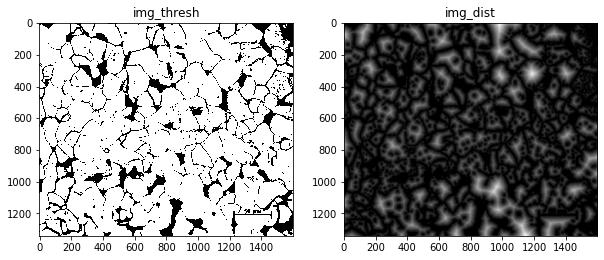

In [139]:
#Transformada de distância
threshold, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)#+cv2.THRESH_BINARY_INV)
img_dist = cv2.distanceTransform(img_thresh, cv2.DIST_L2, 5).astype(np.uint8)

plt.figure(figsize=(10,10)) 
plt.subplot(121),plt.imshow(img_thresh,"gray"),plt.title('img_thresh')
plt.subplot(122),plt.imshow(img_dist  ,"gray"),plt.title('img_dist')
plt.show()

24.0


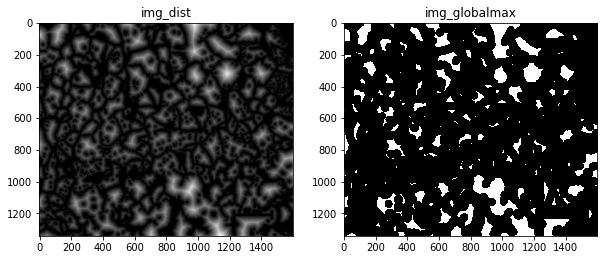

In [140]:
#Máximos Globais
threshold, img_globalmax = cv2.threshold(img_dist, 0.3*img_dist.max(), 255, 0)
print(threshold)

plt.figure(figsize=(10,10)) 
plt.subplot(121),plt.imshow(img_dist     ,"gray"),plt.title('img_dist')
plt.subplot(122),plt.imshow(img_globalmax,"gray"),plt.title('img_globalmax')
plt.show()

## Rotulação e Visualização

n_markers 195


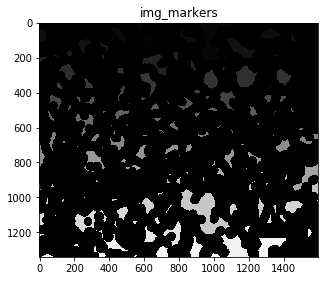

In [144]:
#Rotulação
img_globalmax = np.uint8(img_globalmax)
n_markers, img_markers = cv2.connectedComponents(img_globalmax)
print("n_markers", n_markers)

plt.figure(figsize=(5,5)); plt.title("img_markers"); fig=plt.imshow(img_markers, "gray")

In [146]:
#Definindo função para auxiliar a Visualização
def visualization(img_markers, img):
    img_output = img.copy()
    #Marcando regiões contadas na imagem final
    y,x = img_gray.shape
    for i in range(y):
        for j in range(x):
            if img_markers[i,j]>0: #onde não é preto
                #Marco com um tom de rosa (azul+verde)
                img_output[i,j,0] = img_markers[i,j]
                img_output[i,j,1] = 0
                img_output[i,j,2] = img_markers[i,j]
    return img_output

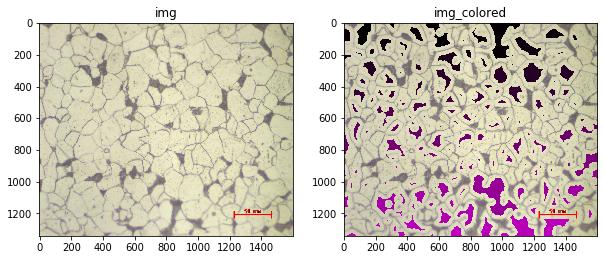

In [149]:
#Visualização
img_colored = visualization(img_markers, img)

plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img'); fig=plt.imshow(img, 'gray')
plt.subplot(122); plt.title('img_colored'); fig=plt.imshow(img_colored, 'gray')

## Contornos
https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html



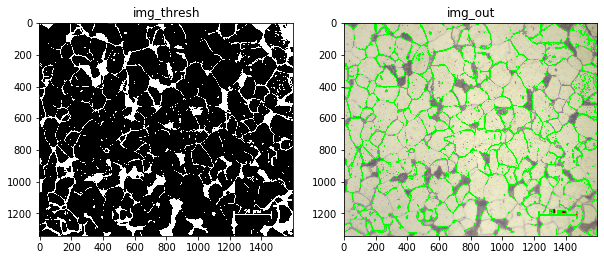

In [3]:
#Gerando Lista de Contornos
threshold, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU+cv2.THRESH_BINARY_INV)
_, contours, _= cv2.findContours(img_thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Desenhando Contornos na imagem original
verde = (0,255,0)
img_out = cv2.drawContours(img.copy(), contours, -1, verde, 3)

plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img_thresh'); fig=plt.imshow(img_thresh, 'gray')
plt.subplot(122); plt.title('img_out'); fig=plt.imshow(img_out, 'gray')

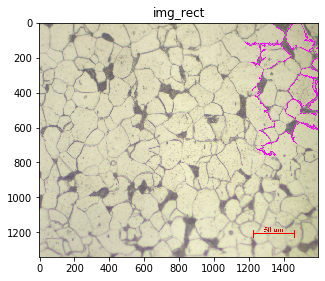

In [7]:
#Ordenando Lista de Contornos de acordo com a área
contours = sorted(contours, key = cv2.contourArea, reverse = True)

#Desenhando maior contorno
rosa = [255,0,255]
img_rect = img.copy()
img_rect = cv2.drawContours(img_rect, contours[0], -1, rosa, 3)
plt.figure(figsize=(5,5)); plt.title("img_rect"); fig=plt.imshow(img_rect, "gray")

In [8]:
#Extraindo coordenadas do maior contorno
box = cv2.boundingRect(contours[0])
print(box)
print('(x_ini, y_ini, largura, altura)')

(1184, 0, 416, 764)
(x_ini, y_ini, largura, altura)


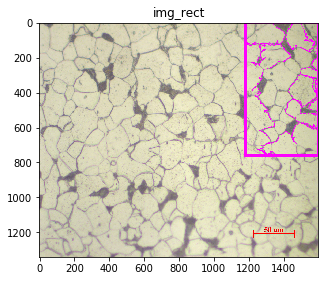

In [9]:
#Desenhando um retângulo a partir dos pontos
(x,y,w,h) = box
espessura = 15
img_rect = cv2.rectangle(img_rect, (x,y), (x+w,y+h), rosa, espessura)

plt.figure(figsize=(5,5)); plt.title("img_rect"); fig=plt.imshow(img_rect, "gray")

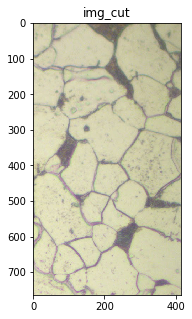

In [10]:
#Recortando imagem
(x,y,w,h) = box
#img_cut = np.ones((x+w,y+h))
img_cut = img[y:y+h, x:x+w,:].copy()
plt.figure(figsize=(5,5)); plt.title("img_cut"); fig=plt.imshow(img_cut, "gray")

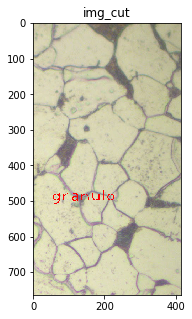

In [223]:
#Escrevendo texto na imagem
texto = 'granulo'
azul = [255,0,0]
espessura = 2
tamanho = 3
coordenadas = (50, 500)
cv2.putText(img_cut, texto, coordenadas, cv2.FONT_HERSHEY_PLAIN, tamanho, azul, espessura)

plt.figure(figsize=(5,5)); plt.title("img_cut"); fig=plt.imshow(img_cut, "gray")

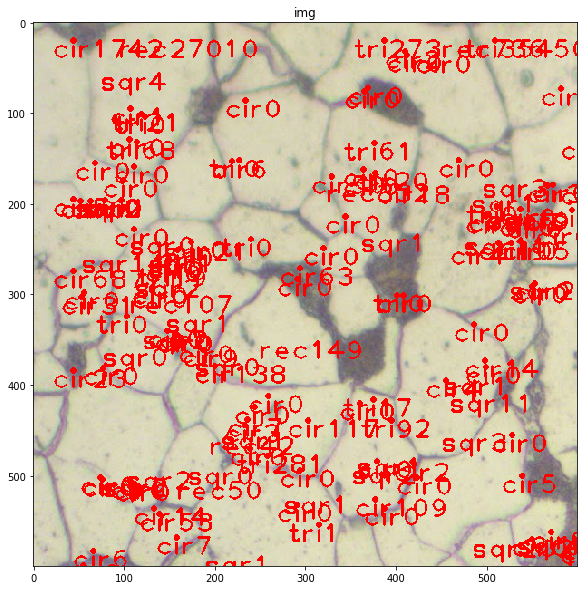

In [11]:
#Exemplo de identificação de formas geométricas usando contornos
for c in contours:
    #8 - retira boundingBox
    (x,y,w,h) = cv2.boundingRect(c)
    
    #9 - calcula número de vértices v com base no comprimento do contorno e em uma aproximação de curva
    v = len( cv2.approxPolyDP(c,0.04* cv2.arcLength(c,True) ,True) )
    
    #10 - condicionais para os tipos geométricos
    name = "tri" if (v==3) else "sqr" if (v==4 and abs(w-h)<10) else "rec" if (v==4) else "cir"
    
    #11 - escreve texto na imagem colorida
    cv2.putText(img, name+str(int(cv2.contourArea(c))) , (x+20, y+40), cv2.FONT_HERSHEY_PLAIN, 2, [255,0,0], 2)


plt.figure(figsize=(10,10)); plt.title("img"); fig=plt.imshow(img[:600,:600,:], "gray")

#referência https://www.pyimagesearch.com/2016/02/08/opencv-shape-detection/